### TEXT PREPROCESSING

In [52]:
import nltk
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize, word_tokenize
from ast import literal_eval
import re, string
import pandas as pd


txt = open('dataset.txt')
raw = txt.read()

def preprocess_word(w):
    # Removes punctuation
    translator = str.maketrans('', '', string.punctuation)
    punctuation = w.translate(translator)

    return punctuation


def preprocessing(x):
    # Returns a nested list of the processed sentences
    
    mentions = re.sub(r'@\w+',"", x) #removes mentions
    numbers = re.sub('[0-9]+', "", mentions) #removes numbers
    links = re.sub(r'http\S+', "", numbers) #removes links
    
    sentence_tokenized = sent_tokenize(links) #sentence tokenization - INACCURATE!!!
    
    lower = [[sent.lower()] for sent in sentence_tokenized] #lower text
     
    in_list = [word for sent in lower for word in sent]

    word_tokenized = [word_tokenize(sent) for sent in in_list]
    word_tokenized = [sent for sent in word_tokenized if sent] #word tokenization
    
    for _id, sent in enumerate(word_tokenized):
        word_tokenized[_id] =  [preprocess_word(w) for w in sent]
    
    words = [[word for word in sent if word != '' and word != 'rt'] for sent in word_tokenized] #removes useless words
    sentences = [sent for sent in words if sent] #removes empty sentences
    
    
    return sentences

text = preprocessing(raw)
print(text)

dataframe =  pd.read_csv("dataset.txt")
print (dataframe.columns)

[['count', 'hatespeech', 'offensivelanguage', 'neither', 'class', 'tweet'], ['as', 'a', 'woman', 'you', 'should', 'nt', 'complain', 'about', 'cleaning', 'up', 'your', 'house'], ['amp', 'as', 'a', 'man', 'you', 'should', 'always', 'take', 'the', 'trash', 'out'], ['boy', 'dats', 'cold', 'tyga', 'dwn', 'bad', 'for', 'cuffin', 'dat', 'hoe', 'in', 'the', 'st', 'place'], ['dawg'], ['you', 'ever', 'fuck', 'a', 'bitch', 'and', 'she', 'start', 'to', 'cry'], ['you', 'be', 'confused', 'as', 'shit'], ['she', 'look', 'like', 'a', 'tranny'], ['the', 'shit', 'you', 'hear', 'about', 'me', 'might', 'be', 'true', 'or', 'it', 'might', 'be', 'faker', 'than', 'the', 'bitch', 'who', 'told', 'it', 'to', 'ya'], ['the', 'shit', 'just', 'blows', 'me', 'claim', 'you', 'so', 'faithful', 'and', 'down', 'for', 'somebody', 'but', 'still', 'fucking', 'with', 'hoes'], ['i', 'can', 'not', 'just', 'sit', 'up', 'and', 'hate', 'on', 'another', 'bitch'], ['i', 'got', 'too', 'much', 'shit', 'going', 'on'], ['cause', 'i', 'm

### BAG OF WORDS 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from ast import literal_eval

try: 
    assert(literal_eval(str(text)) == text.copy())
except AssertionError:
    print('failed to convert')
    
final_str = [" ".join(x) for x in text]

train, test = train_test_split(final_str, test_size=0.2)

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train).toarray()
print(train_counts)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### EMBEDDINGS 

In [72]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np

model = Word2Vec(sentences=text, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

vector = model.wv['bitch'] #returns numpy vector of a word
sims = model.wv.most_similar('bitch', topn=10) #returns similar words

word_vectors = [model.wv[word] for word in text]
print(word_vectors)

[array([[-7.0837494e-03, -5.4702214e-03,  6.2188774e-04,  3.8967389e-04,
        -3.8881241e-03,  6.2816632e-03,  4.7227382e-03,  2.8390992e-03,
         5.8423369e-03,  3.3293129e-03, -7.3949816e-03,  9.0658832e-03,
         3.8154523e-03, -4.2371163e-03, -2.3529015e-03,  2.9913099e-03,
         6.4038737e-03,  7.6364418e-03,  7.7557112e-03, -3.4242216e-03,
        -5.4857447e-03, -8.9827608e-03, -2.6545303e-03, -4.1161231e-03,
        -4.3526222e-03, -4.1901995e-03, -4.4812351e-03, -4.2955056e-03,
        -4.6483963e-03,  5.3003634e-04, -8.4089376e-03,  1.2343976e-03,
         8.3897542e-03, -2.3334883e-03,  8.0234278e-03, -3.5028472e-03,
        -9.1409208e-03,  4.8062272e-04, -9.6738478e-03,  4.5298901e-03,
         9.8915929e-03, -9.4133215e-03,  6.4059305e-03,  6.5553086e-03,
        -3.2469333e-04, -7.3625483e-03, -9.2052491e-05,  8.1459871e-03,
        -9.6453605e-03, -1.3751570e-04, -8.0857314e-03,  1.2495973e-03,
        -1.0111837e-03,  9.6162185e-03, -3.3748862e-03,  7.9768

In [ ]:
from sklearn.decomposition import IncrementalPCA  
from sklearn.manifold import TSNE                 
import numpy as np                                  


def reduce_dimensions(model):
    num_dimensions = 2 


    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key) 

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(autosize=True)
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

AttributeError: 'list' object has no attribute 'lower'

### SYNTAX

In [64]:
def flatten_list(x):
#Takes a nested list and converts it into a list of elements
#where every sublist is a new element

    new_list = [] 
    
    for sent in x:
        sentences = " ".join(sent)
        new_list.append(sentences)
    
    return new_list

new = flatten_list(text)

In [5]:
import spacy

def dependency_parsing(x):
# Returns a nested list of syntactic labels

    nlp = spacy.load("en_core_web_sm")
    dependencies = []
    for sent in x:
        doc = nlp(sent)
        new_list = [token.dep_ for token in doc]
        dependencies.append(new_list)
        
    return dependencies

dep = dependency_parsing(new)


 yall hoes would never get under my skin bad bitch her attitude nasty ooh ooh that s my song hoe loveoohyie skyylevelmedia holipalooza atl bruh said black girls pussy taste like attitudes and arguments lol i just wan na be skinny amp fit sike thick bitches got it going on assfat thundathighs jellyrolls imstillsexy shut your bitch ass up you got something to say about me mention me peezy eyed bit chicken fries shake perfection you hang out with a hoe you gon na turn into a hoe your pussy looks like it died six months ago a photographer hid in a trash can to get these adorable engagement photos ross is tha biggest bitch i have no sympathy for people who bitch about situations they get themselves into mom what happened to insert old friend name you used to be close me fuck that bitch karma s a bitch do nt dish what you ca nt take and if you aint a hoe get up out my traphouseeee great daquan got her pregnant and now i m gon na have a nigger grandbaby bitch ass nigga square up rts and he l

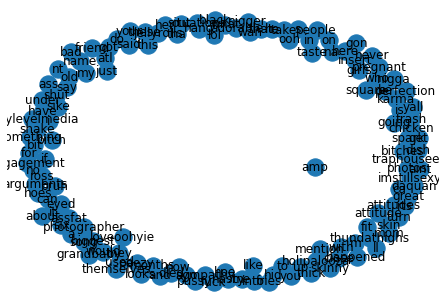

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import string
import pprint
%matplotlib inline

wordset = set()
for sentence in text:
    for word in sentence:
        wordset.add(word)

nlp = spacy.load("en_core_web_sm")

#Add every word as a node
base_graph = nx.Graph()
base_graph.add_nodes_from(wordset)
nx.draw(base_graph, with_labels=True)

graphs = {}
for sentence_id, sentence_contents in enumerate(new):
    sentence_graph = base_graph.copy()
    processed_sentence =  nlp(' '.join(new))
print('\n',processed_sentence)

In [ ]:
#Add edges between the nodes according to syntactic relations
for token in processed_sentence:
    nodeA = token.text
    nodeB = token.head.text
    print('\tadding edge between', nodeA, 'and', nodeB)
    sentence_graph.add_edge(nodeA, nodeB)
    sentence_representation =  nx.adjacency_matrix(sentence_graph) #sparse matrix
    print('\t sparse matrix has ',sentence_representation.count_nonzero(),'nonzero elements')
    graphs[sentence_id] = sentence_representation

In [ ]:
options = {
    "font_size": 20,
    "node_size": 30,
    "node_color": "white",
    "edgecolors": 'blue',
    "linewidths": 2,
    "width": 2,
}
plt.figure(3,figsize=(33,33)) 
nx.draw(sentence_graph, with_labels=True, **options)

In [ ]:
print(sentence_representation)

In [ ]:
print('\n\nsaving representations...')
import pickle
with open('sentence_representations_adjmat.p','wb') as fw:
    pickle.dump(graphs, fw)

### CLASSIFICATION

In [60]:
import numpy as np

feats = np.concatenate([word_vectors,train_counts],axis=0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

dataframe =  pd.read_csv("dataset.txt")
flatten_list(word_vectors)

X = pd.DataFrame(word_vectors)
y = dataframe['class'].astype(int)

TypeError: sequence item 0: expected str instance, numpy.ndarray found

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [18, 35]

In [ ]:
y_pred = classifier.predict(X_test)